In [167]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from matplotlib.collections import PatchCollection
import seaborn as sns
import numpy as np

In [168]:
def get_usinas_dataframe()->pd.DataFrame:
    out_df = pd.DataFrame()
    for path in glob('FATOR_DE_CAPACIDADE\*.csv'):
        aux_df = pd.read_csv(path, sep=';', parse_dates=['din_instante'])
        aux_df.index = aux_df['din_instante']
        out_df = pd.concat([out_df, aux_df])

    return out_df

In [169]:
def get_usina_solar_pipeline(main_df:pd.DataFrame, nome_usina:str)->pd.DataFrame:
    return main_df.query('nom_tipousina=="Solar"').query('nom_usina_conjunto == @nome_usina')

In [170]:
main_df = get_usinas_dataframe()

In [171]:
conjunto_janauba_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Janaúba')

In [172]:
conjunto_futura_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Futura')

In [173]:
main_df

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
din_instante,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,N,Norte,MA,MARANHAO,MIRANDA II500kVA,NaN,-2.727222,-42.596389,-3.566219,-44.535478,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,50.5,101.353,426.00,0.237918
2022-01-01 00:00:00,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,-14.415433,-42.607767,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,NaN,0.000,71.10,0.000000
2022-01-01 00:00:00,NE,Nordeste,BA,BAHIA,IGAPORA II - 69 kV (A),Interior,-14.208409,-42.636807,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Alvorada,2022-01-01 00:00:00,9.0,0.000,38.40,0.000000
2022-01-01 00:00:00,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,-14.027222,-42.629444,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,25.5,62.804,167.70,0.374502
2022-01-01 00:00:00,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,-9.436083,-40.829167,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,7.0,0.000,76.23,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19 23:00:00,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,TRES IRMAOS - 138 kV (A),NaN,-20.790444,-51.529266,-20.656389,-51.482778,Conjunto de Usinas,Solar,Conj. Castilho,2023-04-19 23:00:00,0.0,0.080,210.70,0.000380
2023-04-19 23:00:00,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,DRACENA - 138 kV (A),NaN,-21.450214,-51.587776,-21.457222,-51.526667,Conjunto de Usinas,Solar,Conj. Dracena,2023-04-19 23:00:00,0.0,0.000,81.00,0.000000
2023-04-19 23:00:00,SE,Sudeste/Centro-Oeste,SP,SAO PAULO,GETULINA - 138 kV (A),NaN,-21.893809,-49.863684,-21.855464,-49.838358,Conjunto de Usinas,Solar,Conj. Guaimbê,2023-04-19 23:00:00,0.0,0.000,150.00,0.000000


In [174]:
group_by_usina = main_df.query('nom_tipousina=="Solar"').groupby(['nom_usina_conjunto', 'id_estado']).agg({'val_capacidadeinstalada':'last', 'val_latitudesecoletora':'last', 'val_longitudesecoletora':'last'}).sort_values(by='val_capacidadeinstalada',ascending=False)

In [175]:
group_by_usina.dropna()

,,val_capacidadeinstalada,val_latitudesecoletora,val_longitudesecoletora
nom_usina_conjunto,id_estado,,,
Conj. Janaúba,MG,1020.360000,-15.946560,-43.508374
Conj. São Gonçalo,PI,575.725333,-10.103855,-45.282352
Conj. Lar do Sol,MG,494.970000,-17.363171,-44.696978
Conj. Sol do Sertão,BA,415.030000,-12.239130,-42.610434
Conj. Pirapora,MG,329.000000,-17.405600,-44.922500
Conj. Alex,CE,278.397000,-5.269671,-37.967945
Conj. Serra do Mel C,RN,240.590000,-5.131425,-37.049532
Conj. Rio Alto,PB,216.000000,-6.966100,-37.989200
Conj. São Gonçalo A,PI,215.160000,-10.103855,-45.282352


In [176]:
lon = group_by_usina.dropna()['val_longitudesecoletora'].values
lat = group_by_usina.dropna()['val_latitudesecoletora'].values
values = group_by_usina.dropna()['val_capacidadeinstalada'].values

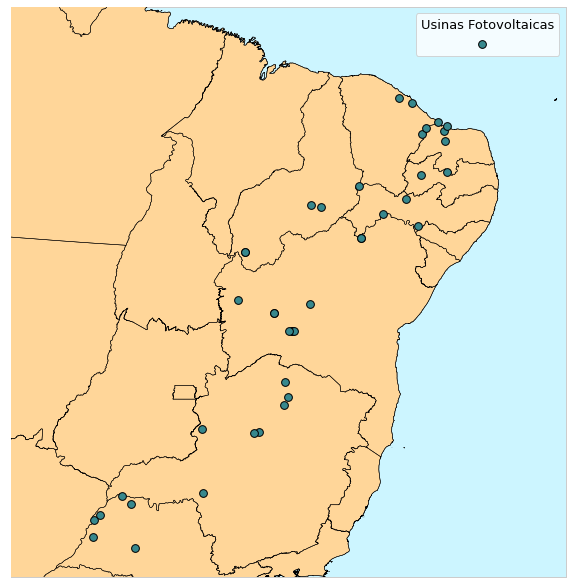

In [177]:
fig, ax = plt.subplots()

m = Basemap(projection='merc', llcrnrlat=-23, urcrnrlat=0,
            llcrnrlon=-55, urcrnrlon=-32, resolution='i')
m.ax = ax
line_color = '#cccccc'
wather_color = '#ccf5ff'

m.drawcoastlines(color=line_color, linewidth=0.1)
#m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

fig.set_size_inches(18.5, 10.5)

m.readshapefile('brasil\\gadm41_BRA_1', 'estados', zorder=5)

m.readshapefile('brasil\\gadm41_BRA_0', 'pais', zorder=5)

x, y = m(lon, lat)

sc = m.scatter(x, y, zorder=10, color='#37888D', s=60, linewidths=1, edgecolor='black',)

patches = [Polygon(np.array(m.pais[0]))]

pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
ax.add_collection(pc)

h = [plt.scatter([],[], color='#37888D', marker="o", s=i, edgecolors='k') for i in [60]]
leg = plt.legend(handles=h, labels=[''],loc='upper right', title="Usinas Fotovoltaicas", fontsize=13,title_fontsize=13)

#leg._legend_box.align = "center"


plt.savefig('MAPA_S.svg')

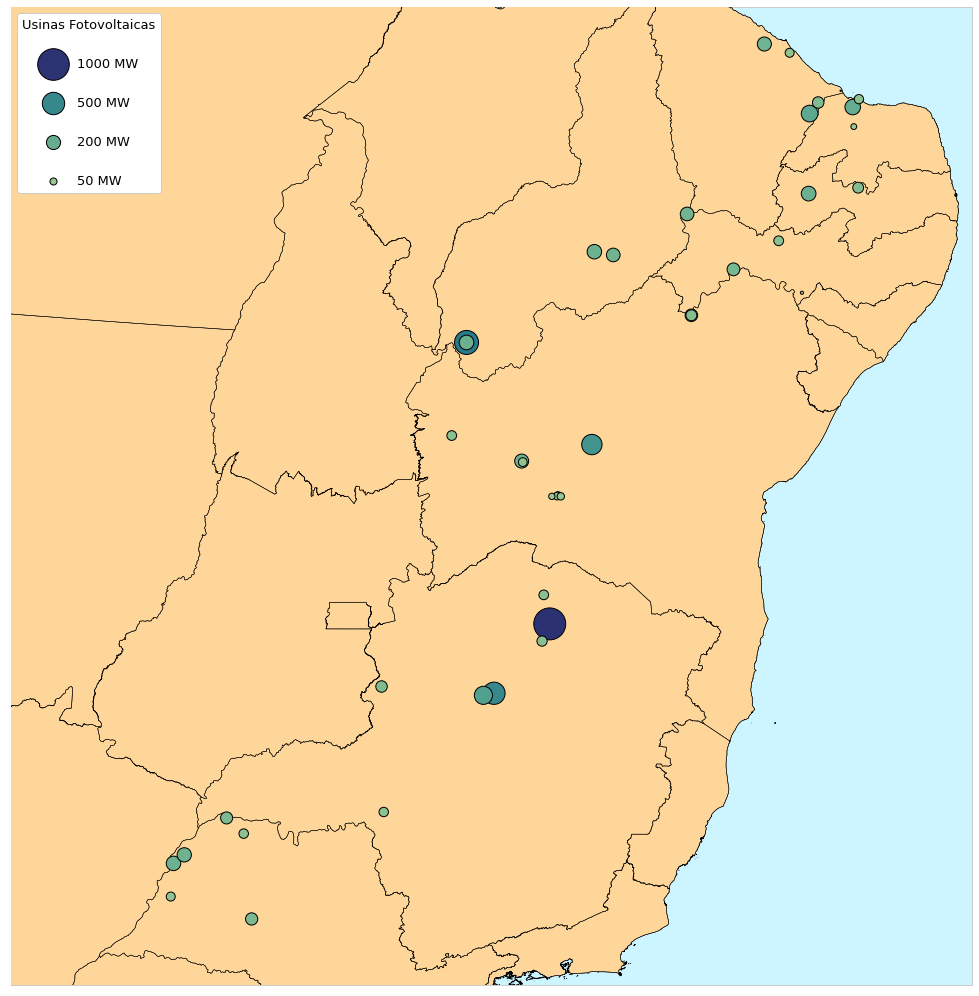

In [178]:
fig, ax = plt.subplots()

m = Basemap(projection='merc', llcrnrlat=-23.2, urcrnrlat=-3,
            llcrnrlon=-55, urcrnrlon=-34.5, resolution='i')
m.ax = ax
line_color = '#cccccc'
wather_color = '#ccf5ff'

m.drawcoastlines(color=line_color, linewidth=0.1)
#m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

fig.set_size_inches(18, 18)

m.readshapefile('brasil\\gadm41_BRA_1', 'estados', zorder=5)

m.readshapefile('brasil\\gadm41_BRA_0', 'pais', zorder=5)

x, y = m(lon, lat)

sc = m.scatter(x, y, s=values, c=values, zorder=10, cmap=sns.color_palette("crest", as_cmap=True)
, linewidths=1, edgecolor='black',)

patches = [Polygon(np.array(m.pais[0]))]

pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
ax.add_collection(pc)

colors = ['#2B3372', '#37888D', '#66AD90', '#99C791']

h = [plt.scatter([],[], color=colors[j], marker="o", s=i, edgecolors='k') for j,i in enumerate([1000,500,200,50])]
leg = plt.legend(handles=h, labels=['1000 MW', '500 MW','200 MW','50 MW'],loc='upper left', title="Usinas Fotovoltaicas", labelspacing=2, fontsize=13,title_fontsize=13, framealpha=1)

leg._legend_box.align = "center"


plt.savefig('MAPA_B.svg')

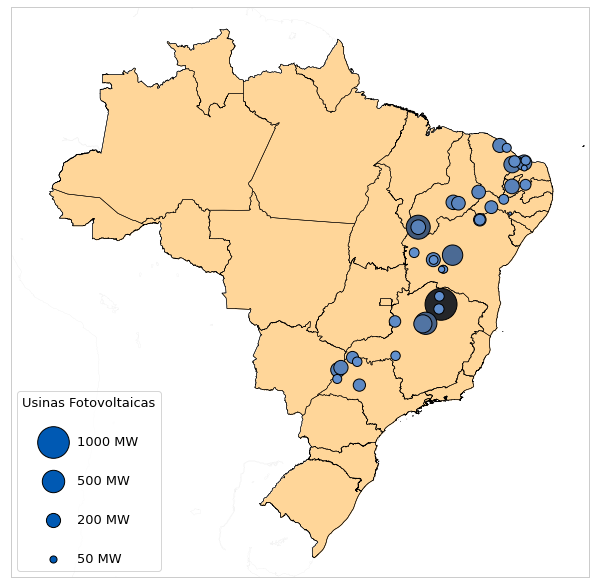

In [179]:
fig, ax = plt.subplots()

m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
            llcrnrlon=-77, urcrnrlon=-32, resolution='i')
m.ax = ax
line_color = '#cccccc'
wather_color = '#ffffff'

m.drawcoastlines(color=line_color, linewidth=0.1)
#m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

fig.set_size_inches(18.5, 10.5)

m.readshapefile('brasil\\gadm41_BRA_1', 'estados', zorder=5)

m.readshapefile('brasil\\gadm41_BRA_0', 'pais', zorder=5)

x, y = m(lon, lat)

sc = m.scatter(x, y, s=values, c=values, zorder=10, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True)
, linewidths=1, edgecolor='black',)

patches = [Polygon(np.array(m.pais[0]))]

pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
ax.add_collection(pc)

h = [plt.scatter([],[], color="#0059b3", marker="o", s=i, edgecolors='k') for i in [1000,500,200,50]]
leg = plt.legend(handles=h, labels=['1000 MW', '500 MW','200 MW','50 MW'],loc='lower left', title="Usinas Fotovoltaicas", labelspacing=2, fontsize=13,title_fontsize=13)

leg._legend_box.align = "center"


plt.savefig('MAPA.svg')

In [ ]:
group_by_usina.groupby(by='id_subsistema').agg({'val_capacidadeinstalada':'sum'})

,val_capacidadeinstalada
id_subsistema,
NE,4994.031933
SE,3656.030000


<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

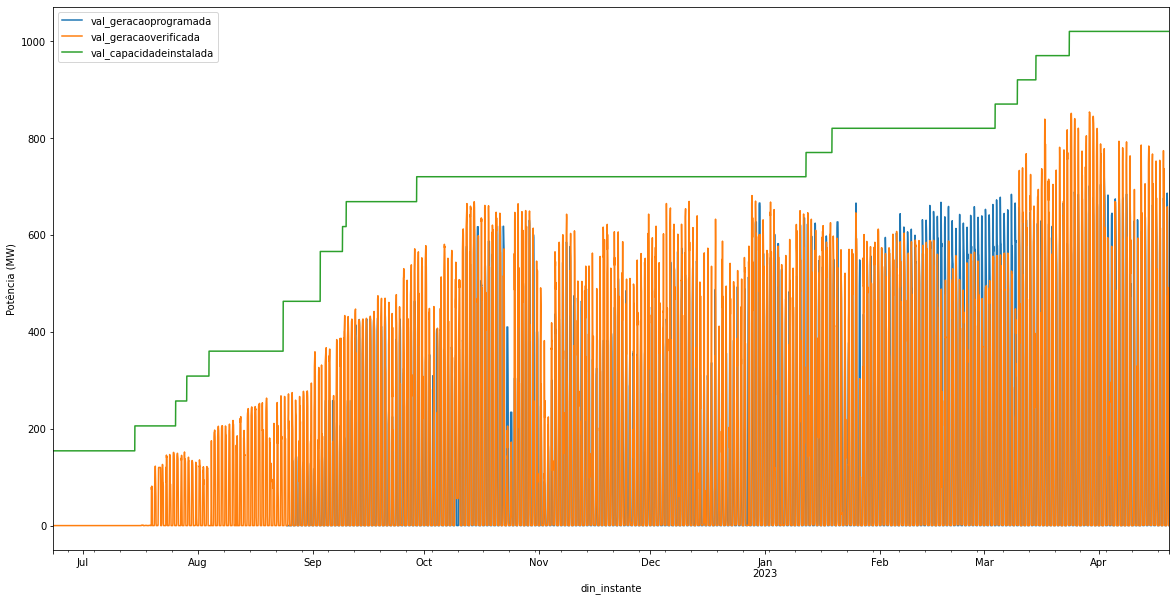

In [181]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

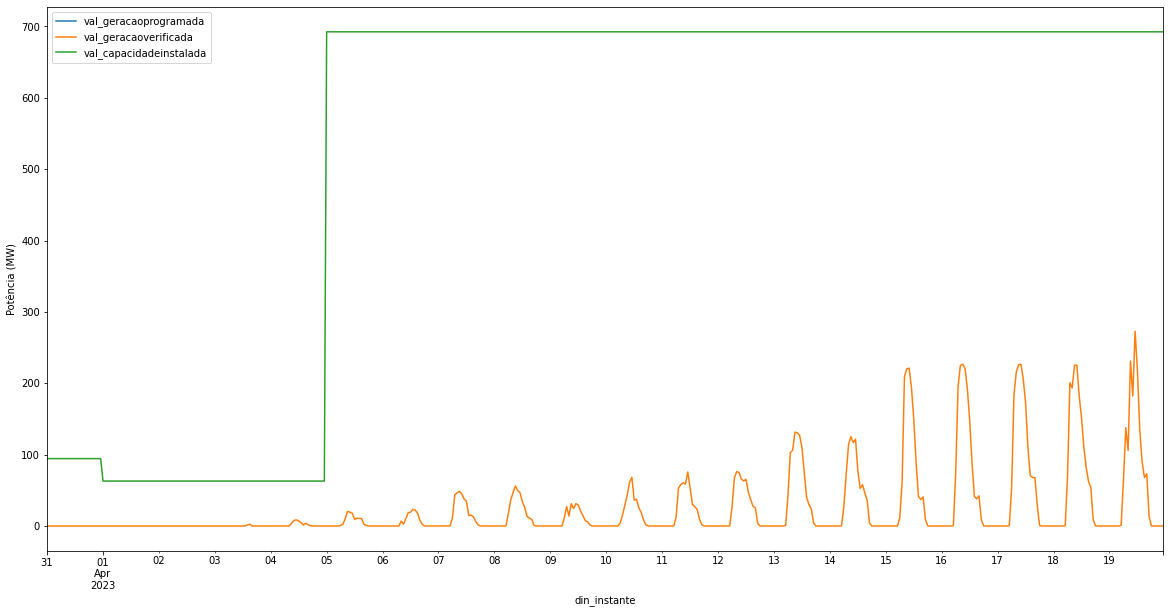

In [182]:
conjunto_futura_df[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

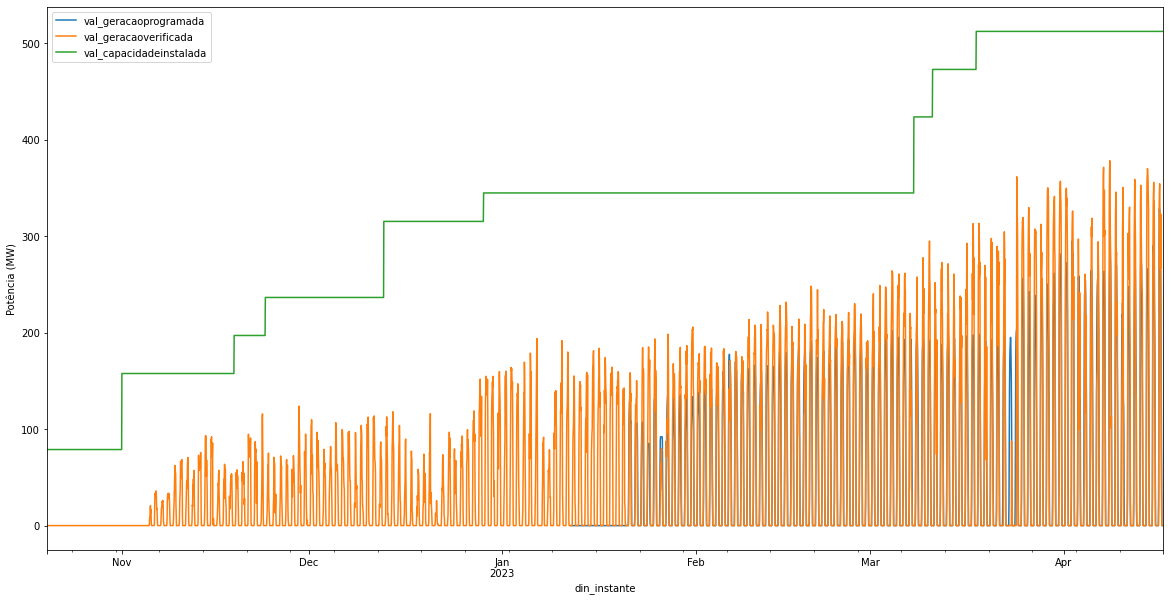

In [ ]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Sol do Cerrado')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

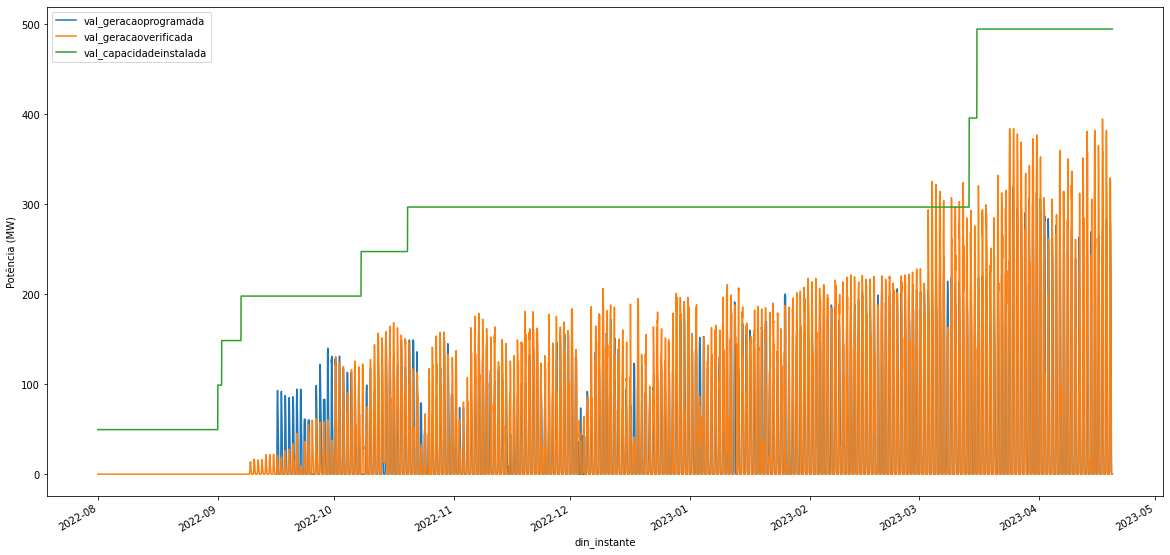

In [184]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Lar do Sol')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

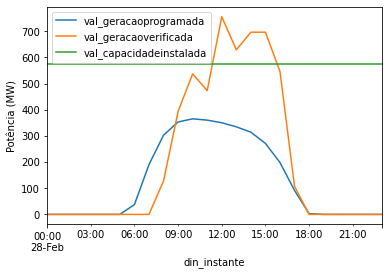

In [ ]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. São Gonçalo')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].loc[lambda x: (x.index.day==28)&(x.index.month==2)&(x.index.year==2023)].plot( ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante'>

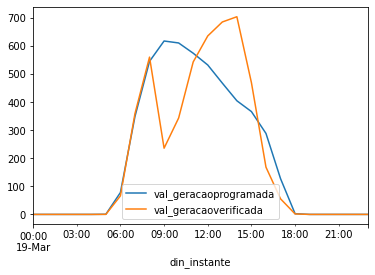

In [ ]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==19)&(x.index.month==3)].plot()

<AxesSubplot:xlabel='din_instante'>

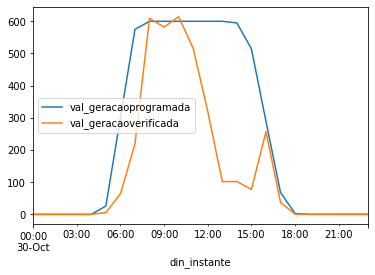

In [ ]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==30)&(x.index.month==10)].plot()

<AxesSubplot:xlabel='din_instante'>

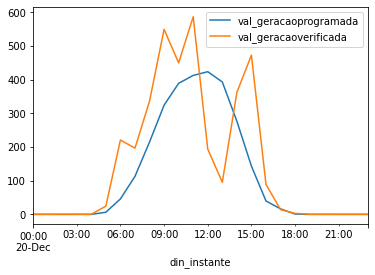

In [ ]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==20)&(x.index.month==12)].plot()

<AxesSubplot:xlabel='din_instante'>

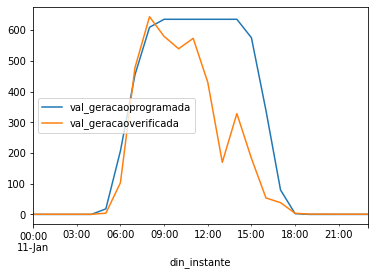

In [ ]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==11)&(x.index.month==1)&(x.index.year==2023)].plot()